In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
df = pd.read_csv(r'C:\Users\madha\Downloads\Day_15_Healthcare_Data (1).csv')
print(df.info())
print(df.isna().sum())
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.show()
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
knn_imputer = KNNImputer(n_neighbors=5)
df.iloc[:, :] = knn_imputer.fit_transform(df)
for col in df.columns:
    if df[col].isna().sum() > 0:
        train_df = df.dropna()
        X_train = train_df.drop(columns=[col])
        y_train = train_df[col]
        reg = LinearRegression()
        reg.fit(X_train, y_train)
        df[col].fillna(reg.predict(df.drop(columns=[col])), inplace=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()
df.to_csv("cleaned_healthcare_dataset.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None
Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64
Missing Values (%):
 Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000
dtype: float64


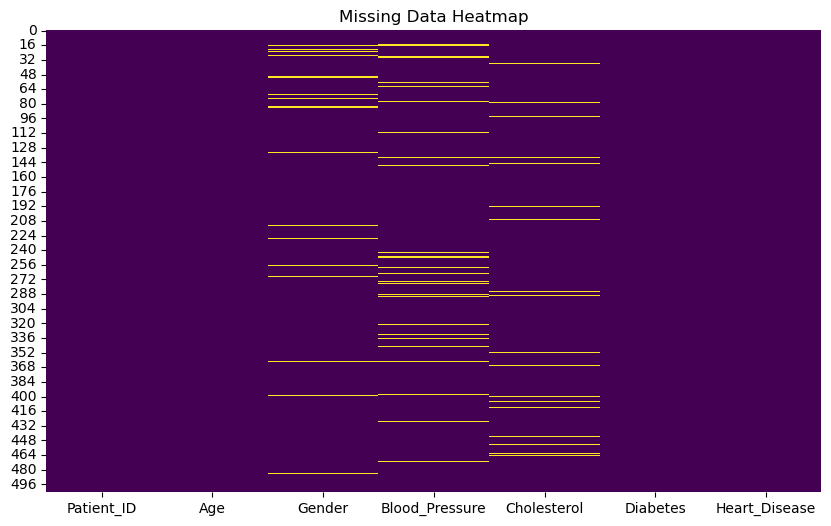

C:\Users\madha\AppData\Local\Temp\ipykernel_2032\3054272052.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\madha\AppData\Local\Temp\ipykernel_2032\3054272052.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

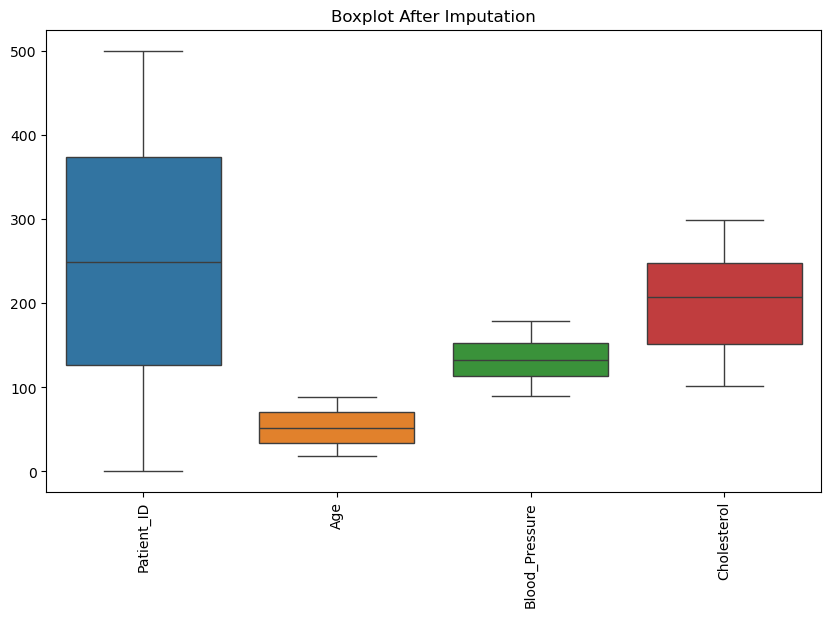

Cleaned dataset saved as cleaned_healthcare_dataset.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import os

# Load Dataset
file_path = r"C:\Users\madha\Downloads\Day_15_Healthcare_Data (1).csv"

if not os.path.exists(file_path):
    print("Error: Dataset file not found!")
    exit()

df = pd.read_csv(file_path)

# Initial EDA
print(df.info())
print(df.isna().sum())

# Missing Data Percentage
missing_percentage = (df.isna().sum() / len(df)) * 100
print("Missing Values (%):\n", missing_percentage)

# Visualizing Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# Mean/Median/Mode Imputation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# KNN Imputation (Only on Numerical Columns)
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

# Regression Imputation (If missing numerical values exist)
for col in numerical_cols:
    if df[col].isna().sum() > 0:
        train_df = df.dropna(subset=[col])
        if len(train_df) > 0:
            X_train = train_df.drop(columns=[col])
            y_train = train_df[col]
            if not X_train.empty:
                reg = LinearRegression()
                reg.fit(X_train, y_train)
                df.loc[df[col].isna(), col] = reg.predict(df.loc[df[col].isna(), X_train.columns])

# Evaluating Imputation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot After Imputation")
plt.show()

# Save Cleaned Dataset
df.to_csv("cleaned_healthcare_dataset.csv", index=False)
print("Cleaned dataset saved as cleaned_healthcare_dataset.csv")
